<a href="https://colab.research.google.com/gist/allanaasilva/59a3a00fcaafa9e759d0d0948e6b4a37/tp2_allana_alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tema:** Agrupamento
### **Base de dados:** https://www.kaggle.com/code/jacksonchou/hr-analytics/data

In [ ]:
#Bibliotecas usadas no projeto
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples,silhouette_score

from warnings import filterwarnings
filterwarnings('ignore')


##**2. Data understanding (Entendimento dos dados)**


In [ ]:
#Carregando a base de dados
file = ('sample_data/HR_comma_sep.csv')  
df = pd.read_csv(file)
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [ ]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# pessoas por departamento
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [ ]:
# quantidade de acidentes
df.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [ ]:
# quantidade de promoções
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [ ]:
# Nível médio de satifação dos funcionários por departamento
fig=px.bar(df.groupby('Department',as_index=False)['satisfaction_level'].mean().sort_values(by='satisfaction_level'),
           x='Department',y='satisfaction_level',color='Department',labels={'Department':'Departamento','satisfaction_level':'Nível de Satisfação'},
           template='ggplot2',title='<b> Nível Médio de Satifação por Departamento')
fig.show(renderer="colab")

In [ ]:
# Número médio de projetos por departamento 
mean_number_project=df.groupby('Department',as_index=False)['number_project'].mean().sort_values(by='number_project').reset_index()
mean_number_project['number_project']=round(mean_number_project['number_project'],2)
fig=px.bar(mean_number_project,x='Department',y='number_project',color='Department',labels={'Department':'Departamento','number_project':'Número de Projetos'},
           text='number_project',template='seaborn',title='<b> Número Médio de Projetos por Departamento')
fig.update_traces(textfont_size=8)
fig.show(renderer="colab")

In [ ]:
# Número Promoções nos últimos 5 Anos por Departamento
mean_promotion_last_5years=df.groupby('Department',as_index=False)['promotion_last_5years'].mean().sort_values(by='promotion_last_5years').reset_index()
mean_promotion_last_5years['promotion_last_5years']=round(mean_promotion_last_5years['promotion_last_5years'],2)
fig=px.bar(mean_promotion_last_5years,x='Department',y='promotion_last_5years',color='promotion_last_5years',labels={'Department':'Departamento','promotion_last_5years':'Promoção últimos 5a'},
           text='promotion_last_5years',template='seaborn',title='<b> Proporção de Promoções nos últimos 5 Anos por Departamento')
fig.update_traces(textfont_size=8)
fig.show(renderer="colab")

In [ ]:
# Número Médio de Anos Trabalhando na Empresa
mean_time_spend_company=df.groupby('Department',as_index=False)['time_spend_company'].mean().sort_values(by='time_spend_company').reset_index()
mean_time_spend_company['time_spend_company']=round(mean_time_spend_company['time_spend_company'],2)
fig=px.bar(mean_time_spend_company,x='Department',y='time_spend_company',color='Department',labels={'Department':'Departamento','time_spend_company':'Tempo de Empresa'},
           text='time_spend_company',template='seaborn',title='<b> Anos Trabalhando na Empresa')
fig.update_traces(textfont_size=8)
fig.show(renderer="colab")

In [ ]:
# Nível de satisfação e salário
fig=px.box(df,x='salary',y='satisfaction_level',color='salary',template='ggplot2',labels={'satisfaction_level':'Nível de Satisfação','salary':'Salário'},title='<b> Nível de Satisfação e Salário')
fig.show(renderer="colab")

In [ ]:
# % de Funcionários que deixaram a Empresa por Faixa de Salário
df_left = df.groupby('salary')['left'].mean().sort_values().reset_index()
fig=px.bar(df_left, x='salary', y='left', color='salary',labels={'salary':'Salário','left':'% Deixaram a Empresa'},
           text='salary',template='seaborn',title='<b> % de Funcionários que deixaram a Empresa por Faixa de Salário')
fig.update_traces(textfont_size=8)
fig.show(renderer="colab")

##**3. Data preparation (Preparação dos dados)**

Este banco de dados não apresenta muitos problemas. Para esta etapa, será feita apenas a  padronização dos dados, para que as variáveis fiquem todas na mesma escala (média zero e desvio padrão 1). 

In [ ]:
# Standard Scaler
dfStd=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']]
scaler = StandardScaler()
scaler.fit(dfStd)
X_scale = scaler.transform(dfStd)
df_scale = pd.DataFrame(X_scale, columns=dfStd.columns)
df_scale.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.462863             -0.882040   
1            0.752814         0.840707        0.971113              1.220423   
2           -2.022479         0.957554        2.593763              1.420657   
3            0.431041         0.899131        0.971113              0.439508   
4           -0.976716        -1.145699       -1.462863             -0.841993   

   time_spend_company  
0           -0.341235  
1            1.713436  
2            0.343655  
3            1.028546  
4           -0.341235

##**4. Modeling (Modelagem)**

Text(0.5, 0, 'Númbero of Clusters')

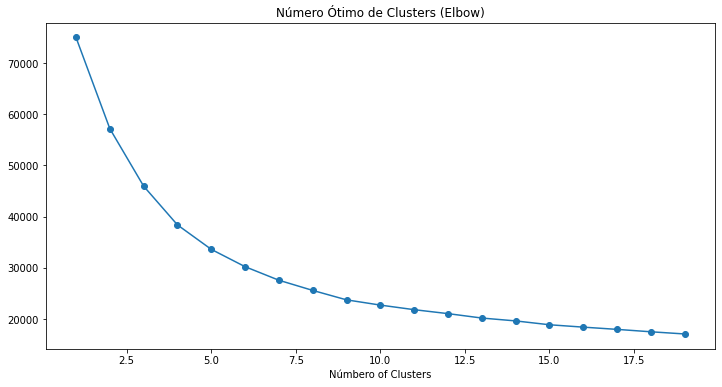

In [ ]:
# Esolha do k ideal
lista = []
k_lista = range(1, 20)
for k in k_lista:
    KM = KMeans(n_clusters=k)
    KM.fit(df_scale)
    lista.append([k, KM.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,20), 'SSE': lista})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(lista)[0], pd.DataFrame(lista)[1], marker='o')
plt.title('Número Ótimo de Clusters (Elbow)')
plt.xlabel('Númbero of Clusters')

Aparentemente, o k ideal parece estar entre 3 e 6. Serão ajustados 4 modelos considerando Ks de 4 a 7 e, após, se escolherá o melhor ajuste, na etapa evaluation.

In [ ]:
# KMeans
kmeans_3 = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale)
labels_scale3 = kmeans_3.labels_

kmeans_4 = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale)
labels_scale4 = kmeans_4.labels_

kmeans_5 = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale)
labels_scale5 = kmeans_5.labels_

kmeans_6 = KMeans(n_clusters=6, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale)
labels_scale6 = kmeans_6.labels_

##**5. Evaluation (Validação)**


Primeiramente, para plotar os clusters, foi usado o PCA para reduzir o conjunto de dados em 3 componentes principais e criar as visualizações em 3D, dos clusters derivados do KMeans, com Ks (número de clusters) de 4 a 7.
O Silhouette Score será usado para avaliar a qualidade dos clusters. 

In [ ]:
for i in [(3,labels_scale3), (4,labels_scale4), (5,labels_scale5), (6,labels_scale6)]: 
  pca = PCA(n_components=3).fit(df_scale) 
  pca2d = pca.transform(df_scale) 
  Scene = dict(xaxis = dict(title  = 'PC1 k = '+str(i[0])),yaxis = dict(title  = 'PC2 k = '+str(i[0])),zaxis = dict(title  = 'PC3 k = '+str(i[0])))
  labels = i[1]
  trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
  layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
  data = [trace]
  fig = go.Figure(data = data, layout = layout)
  fig.show(renderer="colab")

In [ ]:
# Avaliação dos algoritmos com diferentes valores de k
print('KMeans K = 3 Silhouette Score: {}'.format(silhouette_score(df_scale, kmeans_3.labels_, metric='euclidean')))
print('KMeans K = 4 Silhouette Score: {}'.format(silhouette_score(df_scale, kmeans_4.labels_, metric='euclidean')))
print('KMeans K = 5 Silhouette Score: {}'.format(silhouette_score(df_scale, kmeans_5.labels_, metric='euclidean')))
print('KMeans K = 6 Silhouette Score: {}'.format(silhouette_score(df_scale, kmeans_6.labels_, metric='euclidean')))

KMeans K = 3 Silhouette Score: 0.24320401372060713
KMeans K = 4 Silhouette Score: 0.27841757705850845
KMeans K = 5 Silhouette Score: 0.26029415196354483
KMeans K = 6 Silhouette Score: 0.26721636265191784


O melhor agrupamento ocorreu com o k = 4. Vamos agora analisar o comportamento de cada um dos grupos, as diferenças entre eles e como os diferentes fatores afetam a satisfação dos funcionários.

In [ ]:
clusters = pd.concat([df, pd.DataFrame({'clusters':labels_scale4})], axis=1)
clusters

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  clusters  
0                          0      sales     low         1  
1                          0      sales  medium         0  
2                          0      sales  medium         2  
3                          0      sales     low         0  
4                          0      sales     low         1  
...                      ...        ...     ...       ...  
14994                      0    support     low         1  
14995                      0    support     low         1  
14996                      0    support     low         1  
14997                      0    support     low         2  
14998                      0    support     low         1  

[14999 rows x 11 columns]

In [ ]:
# Nível de Satisfação por Cluster
fig=px.box(clusters,x='clusters',y='satisfaction_level',color='clusters',template='ggplot2',labels={'satisfaction_level':'Nível de Satisfação'},title='<b> Nível de Satisfação por Cluster')
fig.show(renderer="colab")

In [ ]:
# Número de Projetos por Cluster
fig=px.box(clusters,x='clusters',y='number_project',color='clusters',template='ggplot2',labels={'satisfaction_level':'Nível de Satisfação','number_project':'Número de Projetos'},title='<b> Número de Projetos por Cluster')
fig.show(renderer="colab")

In [ ]:
# Média de horas trabalhadas por Cluster
fig=px.box(clusters,x='clusters',y='average_montly_hours',color='clusters',template='ggplot2',labels={'satisfaction_level':'Nível de Satisfação','average_montly_hours':'Média de horas trabalhadas'},title='<b> Média de horas trabalhadas por Cluster')
fig.show(renderer="colab")

In [ ]:
# % de Funcionários que deixaram a Empresa por Cluster
df_left = clusters.groupby('clusters')['left'].mean().sort_values().reset_index()
fig=px.bar(df_left, x='clusters', y='left', color='clusters',labels={'left':'% Deixaram a Empresa'},
           template='seaborn',title='<b> % de Funcionários que deixaram a Empresa por Cluster')
fig.update_traces(textfont_size=8)
fig.show(renderer="colab")

In [ ]:
# Salários dos diferentes grupos 
df_g = clusters.groupby(['clusters','salary']).size().reset_index()
df_g['percentage'] = clusters.groupby(['clusters','salary']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['clusters','salary', 'Counts', 'Percentage']
fig=px.bar(df_g, x='clusters', y=['Counts'], color='salary', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.show(renderer="colab")

Mais comentários a respeito dos resultados obtidos estão no relatório final.